<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"

javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.19

A pendulum consists of a 100 g weight at the end of a lightweight rod 120cm in length. The other end of the rod is fixed, but can rotate freely. The frictional forces acting on the moving pendulum are thought to be roughly proportional to its angular velocity.

### a) The pendulum is lifted manually until the rod makes a 45º angle with the vertical. Then the pendulum is released.  Determine the subsequent motion of the pendulum. Use the five-step method, and model as a continuous–time dynamical system. Simulate using the Euler method. Assume that the force due to friction is of magnitude $k\theta'$, where $\theta'$ is the angular velocity in radians per second and the coefficient of friction is $k=0.05$ g/sec.

#### Passo 1 - Variáveis

* $\theta$ = ângulo do pêndulo (radianos)
* $\omega$ = velocidade angular (radianos/segundo)
* $l$ = tamanho da haste (metro)
* $g$ = força da gravidade (metros/segundo^2)
* $k$ = coeficiente de fricção (metro/segundo)
* $m$ = massa do objeto (quilograma)
* $t$ = tempo (segundos)

#### Passo 1 - Suposições do problema

In [ ]:
angulo_inicial = 45
angulo_inicial_radiano = float(N(angulo_inicial*pi/180))

# Coeficiente de fricção
k = 5e-5 # kg/seg
# Tamanho da corda
l = 1.20 # metros
# Massa
m = 0.100 # kg

#### Passo 2 - Abordagem de modelagem

A abordagem selecionada para a resolução do problema é a modelagem por sistema dinâmico.

#### Passo 3 - Formulação do modelo

As equações foram obtidas a partir do seguinte vídeo: https://youtu.be/5Bipvm6xNRQ

Façamos
\begin{align*}
\theta' = f_1(\theta, \omega) \\
w' = f_2(\theta, \omega),
\end{align*}
sendo
\begin{align*}
f_1(\theta, \omega) &= \omega \\
f_2(\theta, \omega) &= 
-\frac{g}{l} \cdot \text{sin}(\theta) - \frac{k}{ml} \cdot \theta' \\
&= -\frac{g}{l} \cdot \text{sin}(\theta) - \frac{k}{ml} \cdot \omega,
\end{align*}
O estado de espaço é
$$S = \{(\theta, \omega): -1 \leq \theta \leq 1, \omega \in \mathcal{R}\}.$$

#### Passo 4 - Resolução do modelo

Temos as seguintes equações diferenciais:

In [ ]:
def equacoes(theta, omega, k, l, m):
    """
    @param theta: Ângulo
    @param omega: Velocidade angular
    @param k: Coeficiente de fricção
    """
    # Velocidade da gravidade
    g = 9.8 #m/s²

    # Derivada de theta
    dtheta = omega

    return (
        dtheta,
        #-m*g/l * sin(theta) - k/(m*l) * dtheta
        -g*sin(theta)/l - k*dtheta/(m*l)
    )
 
theta, omega = var('\\theta \\omega', real=True)

dFdtheta, dFdomega = equacoes(theta, omega, k=k, l=l, m=m)
 
Math(f"""
\\begin{{aligned}}
\\theta' &= {latex(dFdtheta)} \\\\
\\omega' &= {latex(dFdomega)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

O método de Euler implementado:

In [ ]:
def MetodoEuler(funcoes, variaveis, valores_iniciais, N=100, t_0=0, T=400):
    retorno = np.zeros((3, N))
    f1 = lambdify(variaveis, funcoes[0], 'numpy')
    f2 = lambdify(variaveis, funcoes[1], 'numpy')
    
    x1_0, x2_0 = valores_iniciais
 
    x1_n = x1_0
    x2_n = x2_0
    t_n = t_0
 
    retorno[:, 0] = [t_n, x1_n, x2_n]
 
    h = (T-t_0)/N
    for n in range(N-1):
        x1_n = x1_n + h*f1(x1_n, x2_n)
        x2_n = x2_n + h*f2(x1_n, x2_n)
        t_n = t_n+h
 
        retorno[:, n+1] = [t_n, x1_n, x2_n]
    
    resultado = pd.DataFrame(retorno.T, columns=['t', '$\\theta$', '$\omega$'])
    resultado.index = resultado.t
    del resultado['t']
    return resultado

E a simulação do modelo:

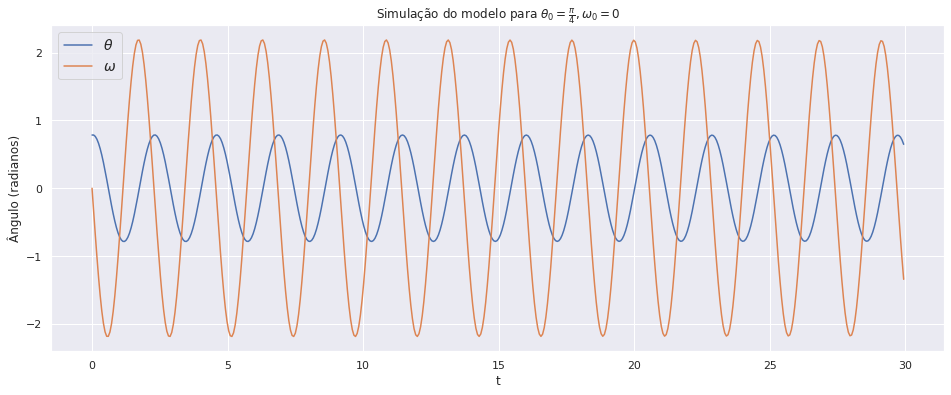

In [ ]:
simulacao_a = MetodoEuler(
    funcoes=(dFdtheta, dFdomega),
    variaveis=(theta, omega),
    valores_iniciais=(angulo_inicial_radiano, 0),
    N=100_000500,
    T=30
)

simulacao_a.plot(figsize=(16, 6), title="Simulação do modelo para $\\theta_0=\\frac{\\pi}{4}, \omega_0=0$", ylabel='Ângulo (radianos)')

Pelo gráfico acima, podemos observar que a solução encontrada pelo método de Euler ainda não converge para o ponto de equilíbrio $(0,0)$. Agora, vejamos um outro gráfico com $T = 30{,}000$ segundos e $N = 500{,}000$ a seguir.

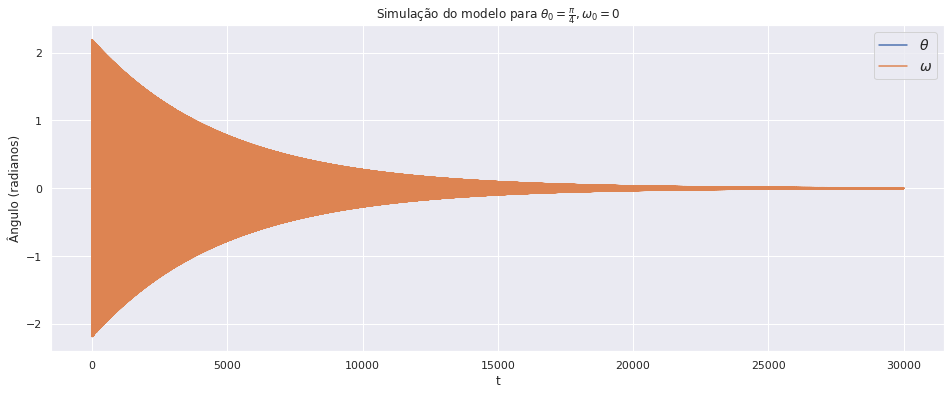

In [ ]:
simulacao_a = MetodoEuler(
    funcoes=(dFdtheta, dFdomega),
    variaveis=(theta, omega),
    valores_iniciais=(angulo_inicial_radiano, 0),
    N=500_000,
    T=30_000
)

simulacao_a.plot(figsize=(16, 6), title="Simulação do modelo para $\\theta_0=\\frac{\\pi}{4}, \omega_0=0$", ylabel='Ângulo (radianos)')

Pelo gráfico acima, a solução encontrada pelo método de Euler tenderá para o ponto de equilíbrio $(0,0)$.

#### Passo 5 - Resposta da pergunta


A medida que o tempo passa, o a fricção diminuirá a velocidade do pêndulo de modo que em um tempo T grande o suficiente, ele irá parar de balançar.

### b) Use a linear approximation to determine the approximate behavior of the system near equilibrium. Assume that the magnitude of the frictional force is $k\theta'$′. How does the local behavior depend on $k$?

Considerando $k$ uma variável, temos a seguinte função Hessiana:

In [ ]:
k_b = var('k', real=True)
dFdtheta_b, dFdomega_b = equacoes(theta, omega, k=k_b, l=l, m=m)

dFdthetatheta = diff(dFdtheta_b, theta)
dFdomegaomega = diff(dFdomega_b, omega)
dFdthetaomega = diff(dFdtheta_b, omega)
dFdomegatheta = diff(dFdomega_b, theta)

H = Matrix([
    [dFdthetatheta, dFdthetaomega],
    [dFdomegatheta, dFdomegaomega]
])

Math(f"H={latex(simplify(H))}")

<IPython.core.display.Math object>

E as seguintes informações para a solução $(0, 0)$:

In [ ]:
#@title 
from IPython.display import Markdown

markdown = lambda string: display(Markdown(string))
math = lambda string: display(Math(string))

def forma_geral(hessiana, solucoes, variaveis):
    for solucao in solucoes:
        forma_geral_solucao(hessiana, solucao, variaveis)
        
def forma_geral_solucao(hessiana, solucao, variaveis):
    markdown(f'## Solução: ${latex(solucao)}$')
    markdown('### Hessiana')
    hessiana = simplify(hessiana.subs(solucao))
    display(Math(f"H={latex(hessiana)}"))

    markdown('### Sistema Linear ')
    x1, x2 = variaveis
    x1l, x2l = var("\\theta' \\omega'", real=True)
    matrizx1lx2l = Matrix([[x1l], [x2l]])
    matrizx1x2 = Matrix([[x1], [x2]])
    math(f'''
\\begin{{aligned}}
{latex(matrizx1lx2l)} &= {latex(hessiana)}{latex(matrizx1x2)} \\\\
{latex(matrizx1lx2l)} &= {latex(hessiana*matrizx1x2)}
\\end{{aligned}}
''')

    markdown('### Solução geral: ')
    t = var(f't', real=True)
    e = var(f'e', real=True)
    l = var(f'\lambda', real=True)

    matriz00 = Matrix([[0], [0]])
    matrizLambda = Matrix([[l, 0], [0, l]])

    partes = []
    for i, (autovalor, multiplicity, matriz) in enumerate(simplify(hessiana).eigenvects()):
        ci = var(f'c{i+1}', real=True)
        partes.append([ci, matriz[0], e**(autovalor*t)])

        markdown(f"""
* **Multiplicidade**: ${latex(multiplicity)}$
* **Autovalor:** ${latex(autovalor)}$
* **Autovetor**
        """)
        display(Math(f'''
\\begin{{aligned}}
&{latex(matrizLambda-hessiana)}{latex(matrizx1x2)}={latex(matriz00)} \\\\
&{latex((matrizLambda-hessiana).subs({l: autovalor}))}{latex(matrizx1x2)}={latex(matriz00)} \\\\
&{latex(matrizx1x2)}={latex(matriz[0])}
\\end{{aligned}}
'''))

    markdown('**Solução geral para o sistema linear**')
    parte1 = ''.join([latex(it) for it in partes[0]])
    parte2 = ''.join([latex(it) for it in partes[1]])
    math(f'{latex(matrizx1x2)}={parte1}+{parte2}')


forma_geral(H, [{omega: 0, theta: 0}], (theta, omega))

## Solução: $\left \{ \omega : 0, \quad \theta : 0\right \}$

### Hessiana

<IPython.core.display.Math object>

### Sistema Linear 

<IPython.core.display.Math object>

### Solução geral: 


* **Multiplicidade**: $1$
* **Autovalor:** $-4.16666666666667 \cdot 10^{-5} - 2.85773803294328 i$
* **Autovetor**
        

<IPython.core.display.Math object>


* **Multiplicidade**: $1$
* **Autovalor:** $-4.16666666666667 \cdot 10^{-5} + 2.85773803294328 i$
* **Autovetor**
        

<IPython.core.display.Math object>

**Solução geral para o sistema linear**

<IPython.core.display.Math object>

Os dois autovalores deram:
$$- 4.16666666666667 k - 0.166666666666667 \left(625.0 k^{2} - 294.0\right)^{0.5}$$

Dado que $k\geq0$, para as soluções reais, o ponto de equilíbrio é um nó estável e nesse caso as exponenciais $e^{−λ_{i}t}$ forçará as demais soluções do sistema decaírem a zero, quando $$(625.0 k^{2} - 294.0)$$ é positivo, sendo que isto ocorre quando $k\geq \frac{7\sqrt{6}}{25}\approx0.685857$.

Para $0 < k < \frac{7\sqrt{6}}{25}$, a parte $$- 0.166666666666667 \left(625.0 k^{2} - 294.0\right)^{0.5}$$ corresponderá a parte imaginária, de modo que a parte real continuará sendo negativa e o ponto de equilíbrio continuará sendo uma espiral estável com soluções decaindo na direção da origem.

Por fim, para $k=0$, teremos os autovalores como 
$$ - 0.166666666666667 \sqrt{- 294},$$ teremos a parte real zerada e a parte imaginária negativa, de modo que as soluções formarão elipses concêntricas, isto é, para $k=0$, o pêndulo continuará em movimento perpetuamente.

### c) Determine the period of the pendulum. How does period vary with $k$?

O período $P$ para um pêndulo ideal é dado pela seguinte equação:

Referência: https://www.math24.net/nonlinear-pendulum/

In [ ]:
g = 9.8 # m/s²
solucao_b = 2*pi*sqrt(l/g)

Math(f"""
\\begin{{aligned}}
\\text{{período}}
    &= 2\\pi\\sqrt{{\\frac{{l}}{{g}}}} \\\\
    &= 2\\pi\\sqrt{{\\frac{{{l}}}{{{g}}}}} \\\\
    &= {N(solucao_b)} \\text{{ segundos}}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Para o pêndulo não linear simulado na questão, esta equação serve como uma aproximação do período. Podemos calcular o período na simulação realizada:

In [ ]:
periodo = simulacao_a['$\\theta$'][1:4].idxmax()

Math(f"""
\\begin{{aligned}}
\\text{{período}}
    &= {periodo} \\text{{ segundos}}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Realizemos o experimento para outros valores de $k$. Nos experimentos abaixo, consideramos tamanho de passo $h=\frac{T}{N}$ menor que nas simulações dos itens anteriores, para dar uma maior precisão. Nas simulações, $k$ variou de $5\cdot10^{-6}$ kg/seg a $5\cdot10^{-1}$ kg/seg.

In [ ]:
ks = [5e-6, 5e-5, 5e-4, 5e-3, 5e-2, 5e-1]

simulacoes_c = []
for k_c in ks:
    simulacoes_c.append(MetodoEuler(
        funcoes=equacoes(theta, omega, k=k_c, l=l, m=m),
        variaveis=(theta, omega),
        valores_iniciais=(angulo_inicial_radiano, 0),
        N=100_000,
        T=2.5
    ))

pd.DataFrame({
    'k (kg/seg)': ks,
    'período (seg)': [
        s['$\\theta$'][1:4].idxmax() for s in simulacoes_c
    ]
})

,k (kg/seg),período (seg)
0,0.000005,2.286550
1,0.000050,2.286500
2,0.000500,2.286100
3,0.005000,2.282325
4,0.050000,2.262600
5,0.500000,1.000000


É possível observar que os valores de $k$ no intervalo $[5\cdot 10^{-6},5\cdot 10^{-2}]$ não modificam tanto o período $P$ simulado já que fica no intervalo $[2.2626, 2.286550]$. Já quando $k \in (5\cdot 10^{-2}, 5\cdot 10^{-1}]$ a mudança é drástica no valor do período $P$ simulado, pois $P \in [1.0,2.2626)$. Vale ressaltar que $N = 100{,}000$ e $T = 2.5$.

### d) This size pendulum will be used as part of the mechanism for a grand-father clock. In order to maintain a certain amplitude of oscillation, a force is to be applied periodically. How much force should be applied, and how often, to produce an amplitude of $\pm$300º? How does the answer depend on the amplitude desired? [Hint: Simulate one period of the pendulum oscillation. Vary the initial angular velocity $\theta′(0)$ to obtain periodic behavior.]